<center> <h1> Hate Speech Analysis </h1> </center>
<center> <h2>  Neural Networks</h2> </center>

<a id="Introduction"></a>
# Introduction
-  The main aim of this project is to explain the task of Hate SPeech Analysis using RNN Model 


<a id="task"></a>
### Task
    Learn Input-Ouput Function
    Given a text as an input and predict ratings label(output)
    
<a id="goal"></a>    
### Goal:
    To learn from input to predict output

<a id="input-output"></a>
### Input-Output: 
#### Input: 
    Comment (text only) 
#### Output:
    Label of the text 
        hate_speech = number of users who judged the tweet to be hate speech.

        offensive_language = number of users who judged the tweet to be offensive.

        neither = number of users who judged the tweet to be neither offensive nor non-offensive.

        class = class label for majority of CF users. 0 - hate speech 1 - offensive language 2 - neither
    
<a id="phases"></a>
# Phases of Machine Learning:

**Training:**
- Learning phase.
   - Subset of data (Train data) is used to train model.
   
**Testing:**
- Subset of data is used to evaluate\test trained model.

**Application:**
- Learned \Trained model is used in real world applications.
    - Predictions are made on the real world data.

## Load Data

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import os

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc,roc_auc_score
from sklearn.metrics import classification_report

In [3]:
''' 
    /*-------------------- LOAD_dataset ----------------
    | Function  : read_csv()
    | Purpose   : Read a Dataset in CSV file Format 
    | Arguments : 
    |       path    : Path to dataset file
    |       dataset : Dataset file name
    | Return    :
    |       dataset : Dataset in DataFrame Format
    *---------------------------------------------------------*/
'''

# Read the Data in CSV Format
# Read the Data in CSV Format
dataset = pd.read_csv('labeled_data.csv')
dataset = pd.DataFrame(dataset)
#Load the Training Data
print(" Data:")
print("=============\n")
dataset.sample(5)

 Data:



,Unnamed: 0,count,hate_speech,offensive_language,neither,label,tweet
5487,5645,3,0,3,0,1,@alexbenovich more than you run pussy
19366,19795,3,1,0,2,2,RT @jjauthor: US ghettos-driven by liberal ide...
23849,24346,3,0,3,0,1,get over it pussies
8806,9051,3,0,3,0,1,Don't let the power of the dollar turn you int...
8222,8449,3,1,2,0,1,Buddy slapped his rent stress out on that mess...


In [5]:
# Define the mapping dictionary
label_mapping = {0: 'Hate Speech', 1: 'Offensive Language', 2: 'Neither'}

# Map the numeric values to their corresponding labels
dataset['label'] = dataset['label'].map(label_mapping)

# List of columns you want to keep
columns_to_keep = ['label', 'tweet']

# Drop columns that are not in the list 'columns_to_keep'
dataset = dataset.drop(columns=dataset.columns.difference(columns_to_keep))
dataset

,label,tweet
0,Neither,!!! RT @mayasolovely: As a woman you shouldn't...
1,Offensive Language,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,Offensive Language,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,Offensive Language,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,Offensive Language,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,Offensive Language,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,Neither,"you've gone and broke the wrong heart baby, an..."
24780,Offensive Language,young buck wanna eat!!.. dat nigguh like I ain...
24781,Offensive Language,youu got wild bitches tellin you lies


## Data Exploration

In [6]:
print(f'The shape of the dataset is : {dataset.shape}')

The shape of the dataset is : (24783, 2)


In [7]:
print(f'The columns are :{dataset.columns}')

The columns are :Index(['label', 'tweet'], dtype='object')


In [8]:
print(f'The dtypes of the dataset : \n\n{dataset.dtypes}')

The dtypes of the dataset : 

label    object
tweet    object
dtype: object


In [9]:
dataset.dropna()

,label,tweet
0,Neither,!!! RT @mayasolovely: As a woman you shouldn't...
1,Offensive Language,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,Offensive Language,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,Offensive Language,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,Offensive Language,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,Offensive Language,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,Neither,"you've gone and broke the wrong heart baby, an..."
24780,Offensive Language,young buck wanna eat!!.. dat nigguh like I ain...
24781,Offensive Language,youu got wild bitches tellin you lies


In [12]:
# Replace 'rating' with the actual column name if it's different
unique_ratings = dataset['label'].value_counts()

print("Unique values of label column and their counts:")
for rating, count in unique_ratings.items():
    print(f"{rating}: {count}")

Unique values of label column and their counts:
Offensive Language: 19190
Neither: 4163
Hate Speech: 1430


In [13]:
df_filtered = dataset.dropna(subset=['label'])
# Assuming your data is stored in a DataFrame called df_filtered
df_filtered.reset_index(drop=True, inplace=True)
df_filtered

,label,tweet
0,Neither,!!! RT @mayasolovely: As a woman you shouldn't...
1,Offensive Language,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,Offensive Language,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,Offensive Language,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,Offensive Language,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,Offensive Language,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,Neither,"you've gone and broke the wrong heart baby, an..."
24780,Offensive Language,young buck wanna eat!!.. dat nigguh like I ain...
24781,Offensive Language,youu got wild bitches tellin you lies


In [14]:
dataset.shape

(24783, 2)

In [15]:

''' 
    /*------------------------PRE-PROCESSING--DATA -------------
    | Function  : lower() & re.sub()
    | Purpose   : Perform following preprocessing:
    |              • Lower case
    |              • Remove Punctuation marks
    |              • Stopwords Removal
    | Arguments : 
    |       text: Text to be pre-processed
    | Return    :
    |       text: Pre-processed text
    *-----------------------------------------------------------------*/
'''


import re
import string
from nltk.corpus import stopwords

def data_preprocessing(text):
    # Check if 'text' is a string
    if not isinstance(text, str):
        return ""  # Return an empty string if 'text' is not a string

    # Remove all URLs
    text = re.sub(r'http\S+', '', text)

    # Remove all names starting with @
    text = re.sub(r'@\w+', '', text)

    # Remove all hashtags
    text = re.sub(r'#\w+', '', text)

    # Remove all numeric digits
    text = re.sub(r'\d+', '', text)

    # Remove all punctuation marks
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove all non-alphabetic characters
    text = re.sub(r'[^a-zA-Z]+', ' ', text)


    # Regular expression matches one or more whitespace characters (\s+) and replaces them with a single space (' ')
    text = re.sub(r'\s+', ' ', text)

    # Convert the text to lower case
    text = text.lower()
    
    # Remove all single characters
    text = re.sub(r'\b\w\b', '', text)
        # Remove extra whitespaces after removing single characters
        
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Remove words with less than 3 characters
    text = ' '.join(word for word in text.split() if len(word) >= 3)
    
    # Remove all English Stopwords
    stop_words = stopwords.words('english')
    text = ' '.join(word for word in text.split() if word.lower() not in stop_words)

    return text

# Apply the Preprocessing on Input Data Comments of Training Data
dataset['tweet'] = dataset['tweet'].apply(data_preprocessing)

print("\n Data After Pre-processing:")
print("====================================\n")
dataset.head(20)


 Data After Pre-processing:



,label,tweet
0,Neither,woman shouldnt complain cleaning house amp man...
1,Offensive Language,boy dats coldtyga dwn bad cuffin dat hoe place
2,Offensive Language,dawg ever fuck bitch start cry confused shit
3,Offensive Language,look like tranny
4,Offensive Language,shit hear might true might faker bitch told
5,Offensive Language,shit blows meclaim faithful somebody still fuc...
6,Offensive Language,sit hate another bitch got much shit going
7,Offensive Language,cause tired big bitches coming skinny girls
8,Offensive Language,amp might get bitch back amp thats
9,Offensive Language,hobbies include fighting mariam bitch


In [16]:
def filter_tweets_by_word_count(dataset, min_words=3):
    # Count the number of words in each entry of the 'Tweet' column
    dataset['Num_Words'] = dataset['tweet'].apply(lambda x: len(str(x).split()))
    
    # Filter the DataFrame to keep only rows with at least min_words words
    filtered_dataset = dataset[dataset['Num_Words'] >= min_words].copy()
    
    # Drop the temporary 'Num_Words' column
    filtered_dataset = filtered_dataset.drop(columns=['Num_Words'])
    
    return filtered_dataset

dataset = filter_tweets_by_word_count(dataset)

# Display the resulting DataFrame
print("Dataset Data:")
print("=======================\n")
dataset.head()

Dataset Data:



,label,tweet
0,Neither,woman shouldnt complain cleaning house amp man...
1,Offensive Language,boy dats coldtyga dwn bad cuffin dat hoe place
2,Offensive Language,dawg ever fuck bitch start cry confused shit
3,Offensive Language,look like tranny
4,Offensive Language,shit hear might true might faker bitch told


In [17]:
# Reset the index
dataset = dataset.reset_index(drop=True)
dataset

,label,tweet
0,Neither,woman shouldnt complain cleaning house amp man...
1,Offensive Language,boy dats coldtyga dwn bad cuffin dat hoe place
2,Offensive Language,dawg ever fuck bitch start cry confused shit
3,Offensive Language,look like tranny
4,Offensive Language,shit hear might true might faker bitch told
...,...,...
22757,Offensive Language,yous muthafin lie right trash mine bible scrip...
22758,Neither,youve gone broke wrong heart baby drove rednec...
22759,Offensive Language,young buck wanna eat dat nigguh like aint fuck...
22760,Offensive Language,youu got wild bitches tellin lies


## Represent Data in Model Understandable Format (Convert Text into Embedding Vectors)

In [21]:
from keras.preprocessing.text import Tokenizer

# Create a tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(dataset['tweet'])

# Convert text to sequences of numbers
sequences = tokenizer.texts_to_sequences(dataset['tweet'])
vocab_size = len(tokenizer.index_word)
vocab_size

19650

In [22]:
from keras.utils import pad_sequences
sequences = pad_sequences(sequences,padding='pre')
sequences.shape

(22762, 23)

In [23]:
sequences

array([[    0,     0,     0, ...,    76,    70,    15],
       [    0,     0,     0, ...,    73,     7,   388],
       [    0,     0,     0, ...,   455,   855,    12],
       ...,
       [    0,     0,     0, ...,    14,    87,   229],
       [    0,     0,     0, ...,     2,  1692,  1098],
       [    0,     0,     0, ...,    17,    50, 19650]])

In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to 'airline_rating'
dataset['labelencoded'] = le.fit_transform(dataset['label'])

In [25]:
dataset

,label,tweet,labelencoded
0,Neither,woman shouldnt complain cleaning house amp man...,1
1,Offensive Language,boy dats coldtyga dwn bad cuffin dat hoe place,2
2,Offensive Language,dawg ever fuck bitch start cry confused shit,2
3,Offensive Language,look like tranny,2
4,Offensive Language,shit hear might true might faker bitch told,2
...,...,...,...
22757,Offensive Language,yous muthafin lie right trash mine bible scrip...,2
22758,Neither,youve gone broke wrong heart baby drove rednec...,1
22759,Offensive Language,young buck wanna eat dat nigguh like aint fuck...,2
22760,Offensive Language,youu got wild bitches tellin lies,2


In [26]:
# Create a dictionary to store unique ratings and their encoded values
rating_encoding = {}

# Iterate over the DataFrame to populate the dictionary
for index, row in dataset.iterrows():
    rating = row['label']
    encoded_value = row['labelencoded']
    # Check if rating is not already in the dictionary
    if rating not in rating_encoding:
        rating_encoding[rating] = encoded_value

# Print out the unique ratings and their encoded values
print("Label Encoding:")
for rating, encoded_value in rating_encoding.items():
    print(f"label: {rating}, Encoded Value: {encoded_value}")


Label Encoding:
label: Neither, Encoded Value: 1
label: Offensive Language, Encoded Value: 2
label: Hate Speech, Encoded Value: 0


In [27]:
num_unique_ratings = dataset['label'].nunique()

print("Number of unique values in the label column:", num_unique_ratings)

Number of unique values in the label column: 3


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sequences, dataset['labelencoded'], test_size=0.2, random_state=42)

In [29]:
X_train

array([[    0,     0,     0, ...,     5,   127,     5],
       [    0,     0,     0, ...,    38,     2,    51],
       [    0,     0,     0, ...,   450, 15442,     5],
       ...,
       [    0,     0,     0, ...,   644,   958,  1942],
       [    0,     0,     0, ...,    31,   875,    66],
       [    0,     0,     0, ...,     1,    65,  1369]])

# Model

## 1. Build RNN Model

### Set Up the Layers
-  **Embedding Layer**
-  **RNN Layer with 64 Memory Units**
-  **Dropout**

In [30]:
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Dense, Bidirectional, SimpleRNN,GRU,LSTM,Dropout

model = Sequential([
    Embedding(input_dim=19700,output_dim=100,input_length=23),
    SimpleRNN(64),
    Dropout(0.5),
    Dense(12,activation='relu'),
    Dense(3,activation='softmax')
])

## Compile the RNN Model
-  **Optimizer**
-  **Loss function**
-  **Metrics**
-  **Learning Rate**
-  **Momentum**

In [31]:
#compiling model
model.compile(optimizer="adam",loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 23, 100)           1970000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                10560     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 12)                780       
                                                                 
 dense_1 (Dense)             (None, 3)                 39        
                                                                 
Total params: 1981379 (7.56 MB)
Trainable params: 1981379 (7.56 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### RNN Model Training

In [32]:
history = model.fit(X_train,y_train,epochs=5, validation_split=0.1)

Epoch 1/5


513/513 [==============================] - 20s 33ms/step - loss: 0.4634 - accuracy: 0.8419 - val_loss: 0.3550 - val_accuracy: 0.8841
Epoch 2/5
513/513 [==============================] - 20s 38ms/step - loss: 0.2374 - accuracy: 0.9195 - val_loss: 0.3586 - val_accuracy: 0.8764
Epoch 3/5
513/513 [==============================] - 20s 38ms/step - loss: 0.1113 - accuracy: 0.9645 - val_loss: 0.4488 - val_accuracy: 0.8682
Epoch 4/5
513/513 [==============================] - 18s 36ms/step - loss: 0.0533 - accuracy: 0.9841 - val_loss: 0.5589 - val_accuracy: 0.8380
Epoch 5/5
513/513 [==============================] - 19s 36ms/step - loss: 0.0378 - accuracy: 0.9885 - val_loss: 0.6823 - val_accuracy: 0.8561


### RNN Model Testing

In [33]:
# Predict on the test data
predictions = model.predict(X_test)
# Now evaluate the model using metrics like accuracy, precision, recall, etc.
from sklearn.metrics import accuracy_score, classification_report

# Convert predictions to class labels (assuming predictions are in one-hot encoded format)
predicted_labels = predictions.argmax(axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_labels)
print(f"Accuracy: {accuracy}")

143/143 [==============================] - 1s 6ms/step
Accuracy: 0.8662420382165605


In [34]:
print("\nprecision Score of RNN:")
print("================================\n")

pscore = round(precision_score(y_test,predicted_labels, average='weighted'),2)
print(pscore)

print("\n\nRecall Score of RNN:")
print("================================\n")

recalscore = round(recall_score(y_test,predicted_labels, average='weighted'),2)
print(recalscore)

print("\n\nF1 Score of RNN:")
print("================================\n")

f1score = round(f1_score(y_test,predicted_labels, average='weighted'),2)
print(f1score)


precision Score of RNN:

0.85


Recall Score of RNN:

0.87


F1 Score of RNN:

0.85


In [35]:
# print classification report
print(classification_report(y_test, predicted_labels, digits  = 2))

              precision    recall  f1-score   support

           0       0.41      0.14      0.21       250
           1       0.75      0.76      0.75       764
           2       0.90      0.94      0.92      3539

    accuracy                           0.87      4553
   macro avg       0.69      0.62      0.63      4553
weighted avg       0.85      0.87      0.85      4553



Text(70.7222222222222, 0.5, 'Real Labels')

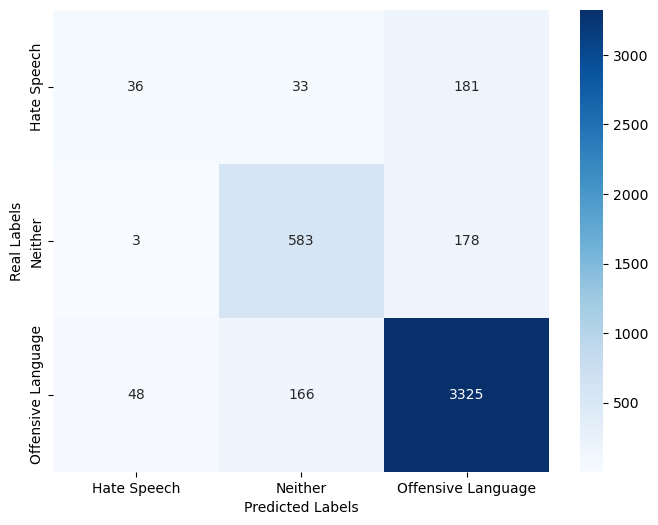

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
#confusion Matrix
plt.figure(figsize = (8,6))
class_names = ["Hate Speech", "Neither", "Offensive Language"]
sns.heatmap(confusion_matrix(y_test,predicted_labels), annot=True, fmt='', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

## 2. Build LSTM Model

### Set Up the Layers
-  **Embedding Layer**
-  **LSTM Layer with 64 Memory Units**
-  **Dropout**

In [38]:
model2 = Sequential([
    Embedding(input_dim=19700,output_dim=100,input_length=23),
    LSTM(64),
#     Dropout(0.5),
#     Dense(12,activation='relu'),
    Dense(3,activation='softmax')
])

#compiling model
model2.compile(optimizer="rmsprop",loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 23, 100)           1970000   
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 2012435 (7.68 MB)
Trainable params: 2012435 (7.68 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Training

In [39]:
history = model2.fit(X_train,y_train,epochs=10, validation_split=0.1)


Epoch 1/10
513/513 [==============================] - 11s 18ms/step - loss: 0.4195 - accuracy: 0.8551 - val_loss: 0.3607 - val_accuracy: 0.8869
Epoch 2/10
513/513 [==============================] - 9s 17ms/step - loss: 0.2726 - accuracy: 0.9080 - val_loss: 0.3115 - val_accuracy: 0.8946
Epoch 3/10
513/513 [==============================] - 9s 17ms/step - loss: 0.2245 - accuracy: 0.9231 - val_loss: 0.3035 - val_accuracy: 0.8973
Epoch 4/10
513/513 [==============================] - 9s 18ms/step - loss: 0.1945 - accuracy: 0.9352 - val_loss: 0.3028 - val_accuracy: 0.8990
Epoch 5/10
513/513 [==============================] - 10s 19ms/step - loss: 0.1723 - accuracy: 0.9432 - val_loss: 0.3186 - val_accuracy: 0.8907
Epoch 6/10
513/513 [==============================] - 11s 21ms/step - loss: 0.1513 - accuracy: 0.9511 - val_loss: 0.3323 - val_accuracy: 0.8946
Epoch 7/10
513/513 [==============================] - 10s 19ms/step - loss: 0.1320 - accuracy: 0.9583 - val_loss: 0.4022 - val_accuracy: 0.

### Testing LSTM

In [40]:
# Predict on the test data
predictions = model2.predict(X_test)
# Now evaluate the model using metrics like accuracy, precision, recall, etc.
from sklearn.metrics import accuracy_score, classification_report

# Convert predictions to class labels (assuming predictions are in one-hot encoded format)
predicted_labels = predictions.argmax(axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_labels)
print(f"Accuracy: {accuracy}")

143/143 [==============================] - 2s 6ms/step
Accuracy: 0.8684383922688337


In [41]:
print("\nprecision Score of LSTM:")
print("================================\n")

pscore = round(precision_score(y_test,predicted_labels, average='weighted'),2)
print(pscore)

print("\n\nRecall Score of LSTM:")
print("================================\n")

recalscore = round(recall_score(y_test,predicted_labels, average='weighted'),2)
print(recalscore)

print("\n\nF1 Score of LSTM:")
print("================================\n")

f1score = round(f1_score(y_test,predicted_labels, average='weighted'),2)
print(f1score)


precision Score of LSTM:

0.87


Recall Score of LSTM:

0.87


F1 Score of LSTM:

0.87


In [42]:
# print classification report
print(classification_report(y_test, predicted_labels, digits  = 2))

              precision    recall  f1-score   support

           0       0.27      0.32      0.29       250
           1       0.86      0.69      0.77       764
           2       0.92      0.94      0.93      3539

    accuracy                           0.87      4553
   macro avg       0.68      0.65      0.66      4553
weighted avg       0.87      0.87      0.87      4553



Text(70.7222222222222, 0.5, 'Real Labels')

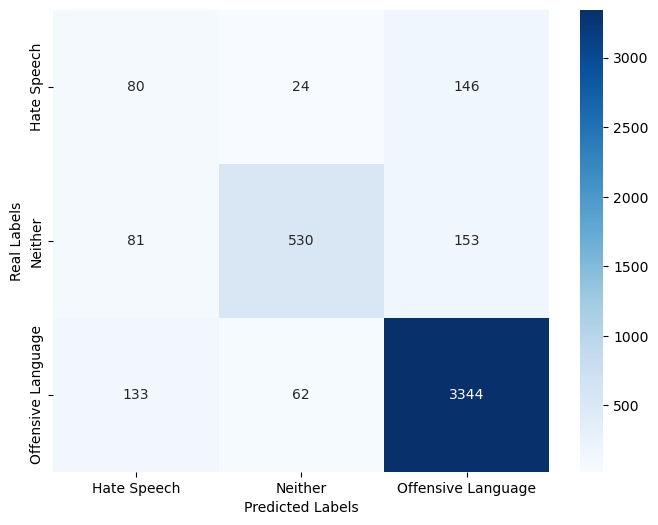

In [43]:
import seaborn as sns
#confusion Matrix
plt.figure(figsize = (8,6))
class_names = ["Hate Speech", "Neither", "Offensive Language"]
sns.heatmap(confusion_matrix(y_test,predicted_labels), annot=True, fmt='', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

## 3. Build GRU Model

### Set Up the Layers
-  **Embedding Layer**
-  **GRU Layer with 64 Memory Units**
-  **Dropout**

In [44]:
model3 = Sequential([
    Embedding(input_dim=19700,output_dim=100,input_length=23),
    GRU(64),
#     Dropout(0.5),
#     Dense(12,activation='relu'),
    Dense(3,activation='softmax')
])

#compiling model
model3.compile(optimizer="rmsprop",loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 23, 100)           1970000   
                                                                 
 gru (GRU)                   (None, 64)                31872     
                                                                 
 dense_3 (Dense)             (None, 3)                 195       
                                                                 
Total params: 2002067 (7.64 MB)
Trainable params: 2002067 (7.64 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
history3 = model3.fit(X_train,y_train,epochs=5, validation_split=0.1)


Epoch 1/5
513/513 [==============================] - 16s 24ms/step - loss: 0.4045 - accuracy: 0.8556 - val_loss: 0.3296 - val_accuracy: 0.8891
Epoch 2/5
513/513 [==============================] - 10s 19ms/step - loss: 0.2608 - accuracy: 0.9121 - val_loss: 0.2984 - val_accuracy: 0.8951
Epoch 3/5
513/513 [==============================] - 8s 16ms/step - loss: 0.2226 - accuracy: 0.9245 - val_loss: 0.3255 - val_accuracy: 0.9072
Epoch 4/5
513/513 [==============================] - 8s 16ms/step - loss: 0.1973 - accuracy: 0.9348 - val_loss: 0.3111 - val_accuracy: 0.8973
Epoch 5/5
513/513 [==============================] - 8s 16ms/step - loss: 0.1724 - accuracy: 0.9440 - val_loss: 0.3521 - val_accuracy: 0.8874


In [46]:
# Predict on the test data
predictions = model3.predict(X_test)
# Now evaluate the model using metrics like accuracy, precision, recall, etc.
from sklearn.metrics import accuracy_score, classification_report

# Convert predictions to class labels (assuming predictions are in one-hot encoded format)
predicted_labels = predictions.argmax(axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_labels)
print(f"Accuracy: {accuracy}")

143/143 [==============================] - 1s 4ms/step
Accuracy: 0.8840325060399736


In [47]:
print("\nprecision Score of GRU:")
print("================================\n")

pscore = round(precision_score(y_test,predicted_labels, average='weighted'),2)
print(pscore)

print("\n\nRecall Score of GRU:")
print("================================\n")

recalscore = round(recall_score(y_test,predicted_labels, average='weighted'),2)
print(recalscore)

print("\n\nF1 Score of GRU:")
print("================================\n")

f1score = round(f1_score(y_test,predicted_labels, average='weighted'),2)
print(f1score)


precision Score of GRU:

0.87


Recall Score of GRU:

0.88


F1 Score of GRU:

0.87


In [48]:
# print classification report
print(classification_report(y_test, predicted_labels, digits  = 2))

              precision    recall  f1-score   support

           0       0.39      0.21      0.27       250
           1       0.89      0.70      0.78       764
           2       0.90      0.97      0.93      3539

    accuracy                           0.88      4553
   macro avg       0.73      0.63      0.66      4553
weighted avg       0.87      0.88      0.87      4553



Text(70.7222222222222, 0.5, 'Real Labels')

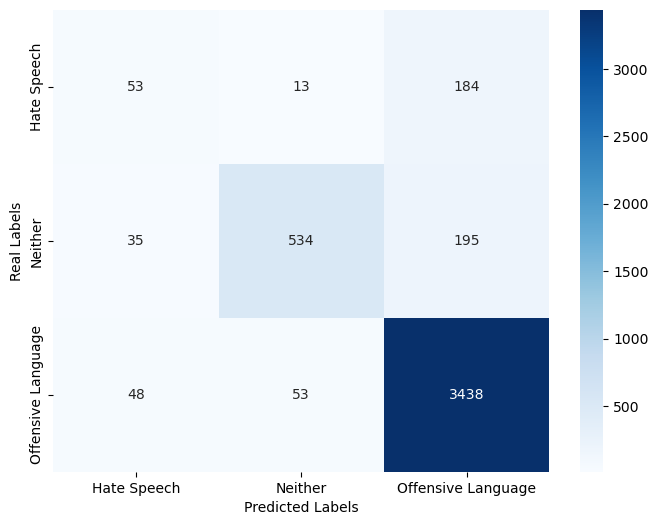

In [49]:
import seaborn as sns
#confusion Matrix
plt.figure(figsize = (8,6))
class_names = ["Hate Speech", "Neither", "Offensive Language"]
sns.heatmap(confusion_matrix(y_test,predicted_labels), annot=True, fmt='', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

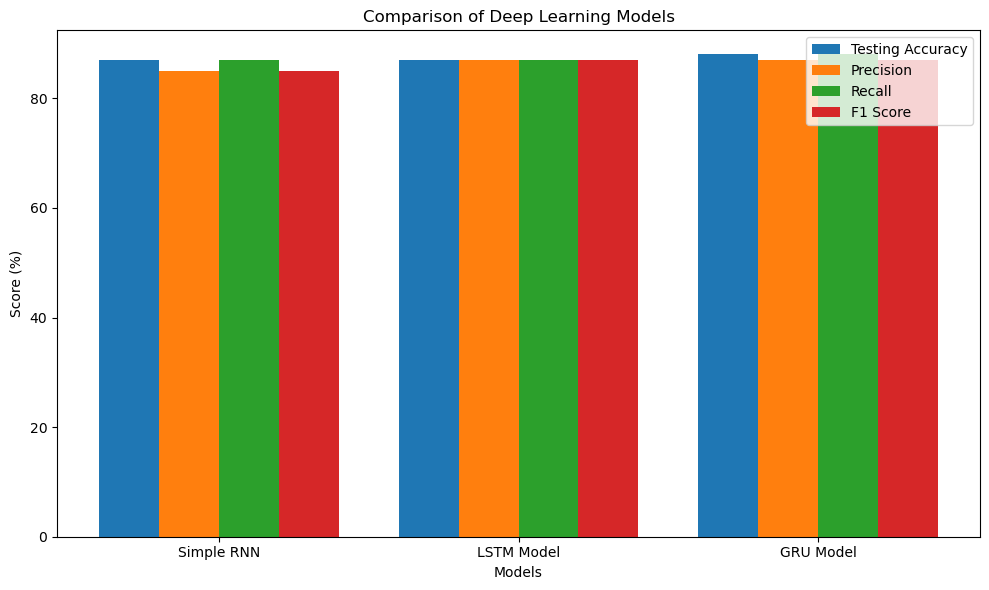

In [51]:
import matplotlib.pyplot as plt

models = ['Simple RNN', 'LSTM Model', 'GRU Model']
testing_accuracy = [87, 87, 88]
precision = [85, 87, 87]
recall = [87, 87, 88]
f1_score = [85, 87, 87]

x = range(len(models))

# Plotting the bar graphs
plt.figure(figsize=(10, 6))

plt.bar(x, testing_accuracy, width=0.2, label='Testing Accuracy')
plt.bar([i + 0.2 for i in x], precision, width=0.2, label='Precision')
plt.bar([i + 0.4 for i in x], recall, width=0.2, label='Recall')
plt.bar([i + 0.6 for i in x], f1_score, width=0.2, label='F1 Score')

plt.xlabel('Models')
plt.ylabel('Score (%)')
plt.title('Comparison of Deep Learning Models')
plt.xticks([i + 0.3 for i in x], models)
plt.legend()

plt.tight_layout()
plt.show()
